In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import time
import copy
import json
import pandas as pd

In [135]:
nasdaq = pd.read_csv('all_2019-08-28.csv')
nasdaq.head()

,article_time,appears_in,article_content,article_link,article_title,author_link,author_name,symbols
0,2006-04-02 10:12:10,"PersonalFinance,CreditandDebt",If you are a savvy taxpayer and have already f...,https://www.nasdaq.com/article/got-a-tax-refun...,Got a tax refund? Then get out of credit card ...,https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey, CreditCards.com",NaN
1,2007-05-16 08:54:43,"PersonalFinance,CreditandDebt",Trying to borrow money without a good credit h...,https://www.nasdaq.com/article/secured-credit-...,"Secured credit cards can help build, repair yo...",https://www.nasdaq.com/author/credit-cards,"By Jeremy Simon, CreditCards.com",NaN
2,2007-10-27 07:08:05,"PersonalFinance,CreditandDebt","When a disaster strikes, credit cards can be a...",https://www.nasdaq.com/article/faqs-about-cred...,FAQs about credit cards and disasters,https://www.nasdaq.com/author/credit-cards,"By Connie Prater, CreditCards.com",NaN
3,2007-12-03 11:13:59,"PersonalFinance,CreditandDebt",The end of the year is the time to consider wr...,https://www.nasdaq.com/article/credit-cards-qu...,"Credit cards quickly fund charities, deliver t...",https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey and Kelly Dilworth, CreditCards...",NaN
4,2007-12-03 11:13:59,"PersonalFinance,CreditandDebt",The end of the year is the time to consider wr...,https://www.nasdaq.com/article/charitable-dona...,Charitable donation by credit card gives quick...,https://www.nasdaq.com/author/credit-cards,"By Ben Woolsey and Kelly Dilworth, CreditCards...",NaN


In [178]:
#con_list = nasdaq['article_content'][:9]
#content = (" ".join(str(i) for i in con_list))
content = nasdaq['article_content'][0]

In [179]:
import re 
content1 = [re.sub('\r', '', c) for c in content]
content2 = [re.sub('\n', '', c) for c in content1]


In [166]:
sentences = [re.split(r'[.,?!;]',c) for c in content2]
new_sents = []
for i in range(int(len(sentences)/2)):
    sent = sentences[2*i] + sentences[2*i+1]
    new_sents.append(sent)

In [180]:
content1

['I',
 'f',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'a',
 ' ',
 's',
 'a',
 'v',
 'v',
 'y',
 ' ',
 't',
 'a',
 'x',
 'p',
 'a',
 'y',
 'e',
 'r',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'a',
 'l',
 'r',
 'e',
 'a',
 'd',
 'y',
 ' ',
 'f',
 'i',
 'l',
 'e',
 'd',
 ' ',
 'y',
 'o',
 'u',
 'r',
 ' ',
 't',
 'a',
 'x',
 '\n',
 'r',
 'e',
 't',
 'u',
 'r',
 'n',
 ',',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'c',
 'o',
 'm',
 'm',
 'e',
 'n',
 'd',
 'e',
 'd',
 '.',
 ' ',
 'A',
 'n',
 ' ',
 'a',
 'l',
 'a',
 'r',
 'm',
 'i',
 'n',
 'g',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 ' ',
 'o',
 'f',
 ' ',
 'f',
 'i',
 'l',
 'e',
 'r',
 's',
 ' ',
 'w',
 'a',
 'i',
 't',
 '\n',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 '1',
 '1',
 't',
 'h',
 ' ',
 'h',
 'o',
 'u',
 'r',
 ' ',
 't',
 'o',
 ' ',
 's',
 't',
 'a',
 'n',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 'l',
 'i',
 'n',
 'e',
 ' ',
 'a',
 't',
 '

In [167]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
def tokenize(corpus):
    results = []
    for text in corpus:
        tmp = text.split(r' ')
        norm = [w.lower() for w in tmp]
        lemmatizer = WordNetLemmatizer()
        lem = [lemmatizer.lemmatize(n) for n in norm]
        filt = [w for w in lem if w not in stopwords.words('english')]
        results.append(" ".join(filt))
    
    return results

In [168]:
def remove_stop_words(corpus):
    stop_words = ["a", "about", "above", "above", "across", "after", "afterwards", "again",
                  "against", "all", "almost", "alone", "along", "already", "also","although",
                  "always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another",
                  "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  
                  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before",
                  "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", 
                  "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", 
                  "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", 
                  "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", 
                  "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", 
                  "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", 
                  "former", "formerly", "forty", "found", "four", "from", "front", "full", "further",
                  "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", 
                  "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", 
                  "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", 
                  "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", 
                  "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", 
                  "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", 
                  "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", 
                  "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", 
                  "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", 
                  "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", 
                  "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", 
                  "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", 
                  "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", 
                  "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there",
                  "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",  "third",
                  "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", 
                  "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", 
                  "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", 
                  "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", 
                  "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", 
                  "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", 
                  "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "--", "(", ")"]
    results = []
    for text in corpus:
        tmp = text.split(r' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [169]:
tok = tokenize(new_sents)
corpus = remove_stop_words(tok)

AttributeError: 'list' object has no attribute 'split'

In [125]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [126]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [127]:
data

[['trying', 'borrow'],
 ['trying', 'money'],
 ['borrow', 'trying'],
 ['borrow', 'money'],
 ['borrow', 'good'],
 ['money', 'trying'],
 ['money', 'borrow'],
 ['money', 'good'],
 ['money', 'credit'],
 ['good', 'borrow'],
 ['good', 'money'],
 ['good', 'credit'],
 ['good', 'history'],
 ['credit', 'money'],
 ['credit', 'good'],
 ['credit', 'history'],
 ['credit', 'leaveconsumers'],
 ['history', 'good'],
 ['history', 'credit'],
 ['history', 'leaveconsumers'],
 ['history', 'caught'],
 ['leaveconsumers', 'credit'],
 ['leaveconsumers', 'history'],
 ['leaveconsumers', 'caught'],
 ['leaveconsumers', 'vicious'],
 ['caught', 'history'],
 ['caught', 'leaveconsumers'],
 ['caught', 'vicious'],
 ['caught', 'circle:'],
 ['vicious', 'leaveconsumers'],
 ['vicious', 'caught'],
 ['vicious', 'circle:'],
 ['vicious', 'good'],
 ['circle:', 'caught'],
 ['circle:', 'vicious'],
 ['circle:', 'good'],
 ['circle:', 'credit'],
 ['good', 'vicious'],
 ['good', 'circle:'],
 ['good', 'credit'],
 ['good', 'requiredto'],
 [

In [128]:
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df

trying borrow money good credit history leaveconsumers caught vicious circle: good credit requiredto approved loan good credit achieved byhaving using -- credit responsibly time
enter secured credit card card product offer borrowersaccess line credit
 borrower goodcredit history lender willing extend credit suchborrowers credit line secured cash deposit(provided consumer) guarantee bank repaideven cardholder run trouble
 result securedcards provide credit borrower denied forloans past
 simulatneously helping build credithistory approved unsecured credit thefutureconsumer advocate say product helpful tool forcertain borrower
 secured card good choice whohave trouble opening traditional line credit say gailcunningham
 vice president public relation nationalfoundation credit counseling example people agood fit secured card establishing creditfor time attempting rebuild credit
 shesaysborrowers make payment using secured card theywould traditional unsecured credit card
 sure willbuild cred

,input,label
0,trying,borrow
1,trying,money
2,borrow,trying
3,borrow,money
4,borrow,good
5,money,trying
6,money,borrow
7,money,good
8,money,credit
9,good,borrow


In [129]:
word2int

{'': 0,
 'theywould': 1,
 'past': 2,
 'use': 3,
 'credit': 4,
 "card's": 5,
 'establishing': 6,
 'carefully': 7,
 'despite': 8,
 'obligation': 9,
 'opening': 10,
 'cunninghamsays': 11,
 'bad': 12,
 'doe': 13,
 'shesaysborrowers': 14,
 'fee': 15,
 "thenfcc's": 16,
 'guarantee': 17,
 'away': 18,
 'tool': 19,
 'thevicious': 20,
 'open': 21,
 'bank': 22,
 'helping': 23,
 'helpful': 24,
 'creditfor': 25,
 'period': 26,
 'offer': 27,
 'trouble': 28,
 'forcertain': 29,
 'benefit': 30,
 'borrow': 31,
 'mean': 32,
 'run': 33,
 'downside': 34,
 'small': 35,
 'establish': 36,
 'attempting': 37,
 'line': 38,
 'nasdaq': 39,
 'thefutureconsumer': 40,
 'payment': 41,
 'islimited': 42,
 'card': 43,
 'rebuild': 44,
 'convenience': 45,
 'loan': 46,
 'people': 47,
 'view': 48,
 'borrowersaccess': 49,
 'securedcards': 50,
 'willing': 51,
 'break': 52,
 'caught': 53,
 'using': 54,
 'activity': 55,
 'nationalfoundation': 56,
 'agood': 57,
 'byhaving': 58,
 'make': 59,
 'lender': 60,
 'vice': 61,
 'money': 6

In [130]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [131]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  6.2912493
iteration 3000 loss is :  4.7928176
iteration 6000 loss is :  4.4952116
iteration 9000 loss is :  4.319555
iteration 12000 loss is :  4.205312
iteration 15000 loss is :  4.1305046
iteration 18000 loss is :  4.0748205


In [132]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.3706187   2.9032927 ]
 [ 1.3760378   2.1312718 ]
 [-0.5876454   1.171009  ]
 [ 0.28683072  0.37902352]
 [ 0.8743652   0.86359346]
 [ 0.5256919   0.6926702 ]
 [ 1.3367014   0.4654092 ]
 [ 1.176666    1.189455  ]
 [ 0.9833167   0.08136049]
 [ 0.5526188  -0.777676  ]
 [ 0.29111582  2.2025337 ]
 [ 1.0568352  -0.85460925]
 [ 1.9175768   0.11279413]
 [ 1.4264753   1.1312342 ]
 [ 0.5919013   0.5364972 ]
 [ 1.6414046   0.96019197]
 [-0.775828    0.7562899 ]
 [-1.1310341   1.3385534 ]
 [ 1.2641644   1.1089296 ]
 [ 0.9803119  -1.1182612 ]
 [ 0.2188783  -1.327674  ]
 [-0.2046687   0.8492154 ]
 [-1.4872389   1.2191473 ]
 [ 0.8444631  -0.25963622]
 [ 0.57828575 -0.7704834 ]
 [ 0.9807539   1.1470025 ]
 [ 0.60124123 -0.35275114]
 [ 1.4988751   1.1526952 ]
 [-0.87612534  2.0076365 ]
 [ 0.9830344  -1.1376828 ]
 [ 0.6504768   0.70234865]
 [ 0.13927236  1.2133789 ]
 [ 1.2014875   0.82218707]
 [-1.6108515   2.0430274 ]
 [ 1.0631185   1.3481052 ]
 [ 1.6051787  -0.10776985]
 [ 1.0409324  -1.1797879 ]
 

In [133]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,,-0.370619,2.903293
1,theywould,1.376038,2.131272
2,past,-0.587645,1.171009
3,use,0.286831,0.379024
4,credit,0.874365,0.863593
5,card's,0.525692,0.692670
6,establishing,1.336701,0.465409
7,carefully,1.176666,1.189455
8,despite,0.983317,0.081360
9,obligation,0.552619,-0.777676


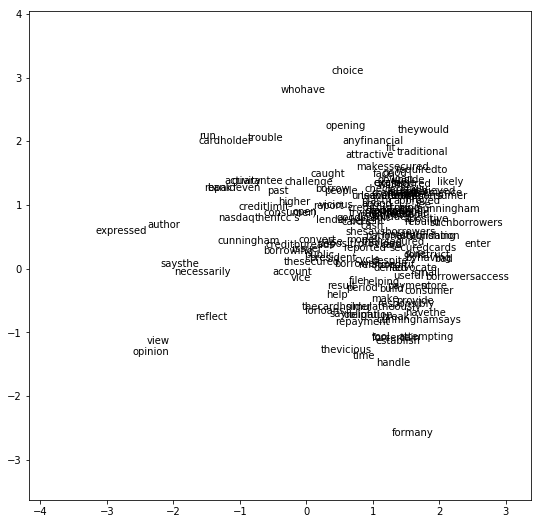

In [181]:
plt.rcParams['figure.figsize'] = (9,9)
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
#plt.rcParams["figure.figsize"] = (10,10)

plt.savefig('text.png', transparent=True)